### Realce de imagens

### Subtração de iamgens

In [ ]:
result = cv2.subtract(img1, img2)

#### Negativo de uma imagem

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

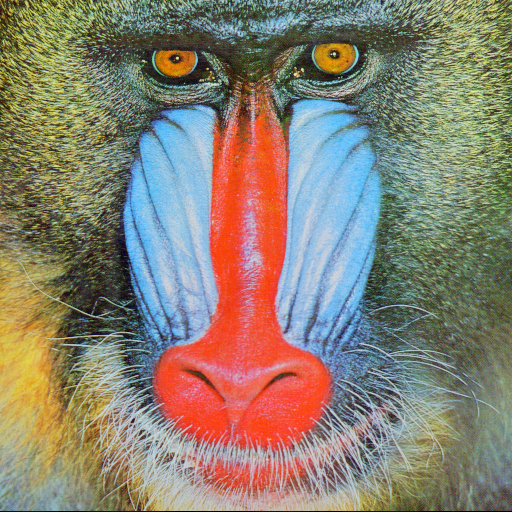

In [ ]:
img_color = cv2.imread('./data/baboon.png', cv2.IMREAD_COLOR)

cv2_imshow(img_color)

In [ ]:
def negativo_image_color(img):
  # The input img is already a NumPy array, so no need to put it in a list
  H, W, C = img.shape
  neg_img = np.full((H, W, C), 255)
  negative_img = neg_img - img
  return negative_img

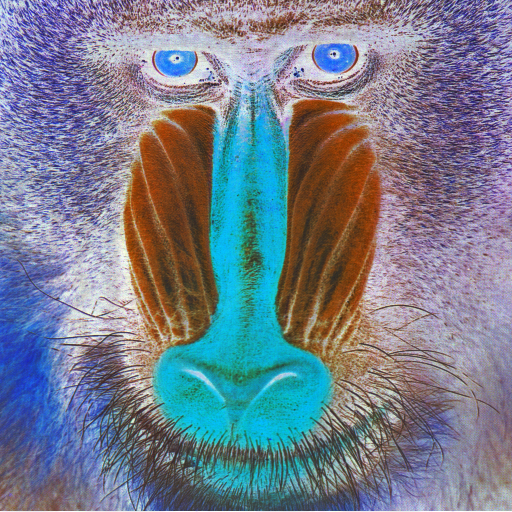

In [ ]:
img_negative = negativo_image_color(img_color)

cv2_imshow(img_negative)

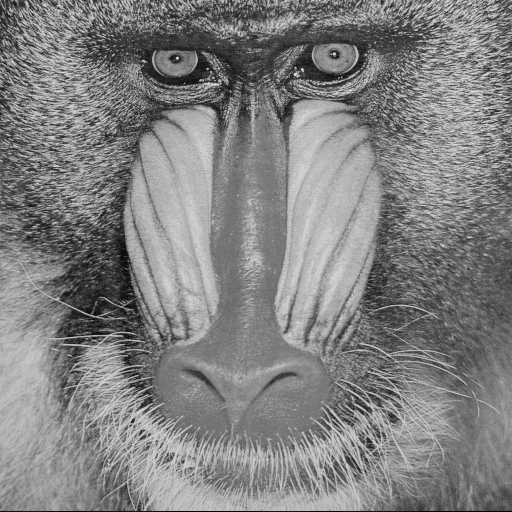

In [ ]:
img_cinza = cv2.imread('./data/baboon.png', cv2.IMREAD_GRAYSCALE)

cv2_imshow(img_cinza)

In [ ]:
def negativo_image_grayscale(img):
  neg_img = np.full(img.shape, 255)
  negative_img = neg_img - img
  return negative_img

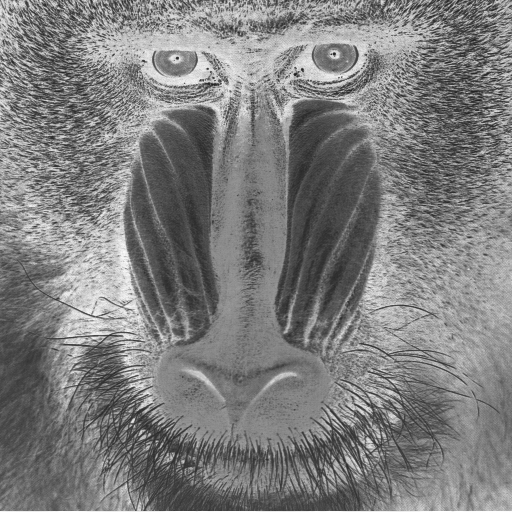

In [ ]:
img_negative_grayscale = negativo_image_grayscale(img_cinza)

cv2_imshow(img_negative_grayscale)

### Translação de uma imagem

In [ ]:
def simples_translacao(img, trX, trY):
  # Codigo aqui
  H, W, C = img.shape

  imagem_transladada = np.zeros((H, W, C))

  for a in range(H):
    for b in range(W):
      if(((a + trY) > H-1) or ((b + trX) > W - 1)):
        continue

      imagem_transladada[a + trY, b + trX, :] = img[a, b, :]

  return imagem_transladada

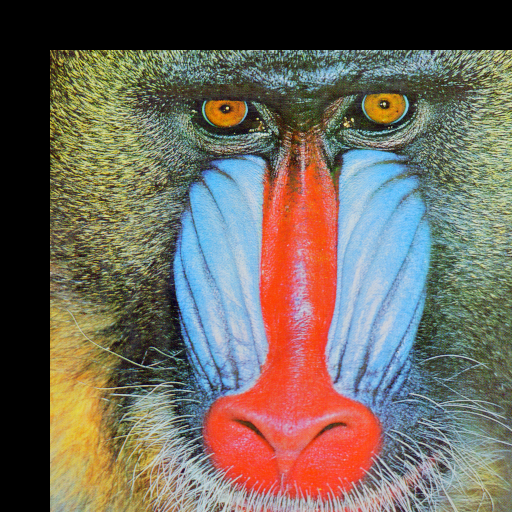

In [ ]:
trImg = simples_translacao(img_color, 50, 50)

cv2_imshow(trImg)

In [ ]:
#img_gray_scale = simples_translacao(img_cinza, 50, 50)

#cv2_imshow(img_gray_scale)

# Criar uma função que le imagem em escala de cinza e colorida que faça translacao

In [ ]:
def translacao_warpAffine(img, trX, trY):
  if len(img.shape) == 3: # Color image
    H, W, _ = img.shape
  else: # Grayscale image
    H, W = img.shape

  matriz_translacao = np.float32([[1, 0, trX], [0, 1, trY]])

  img_transladada = cv2.warpAffine(img, matriz_translacao, (W, H))

  return img_transladada

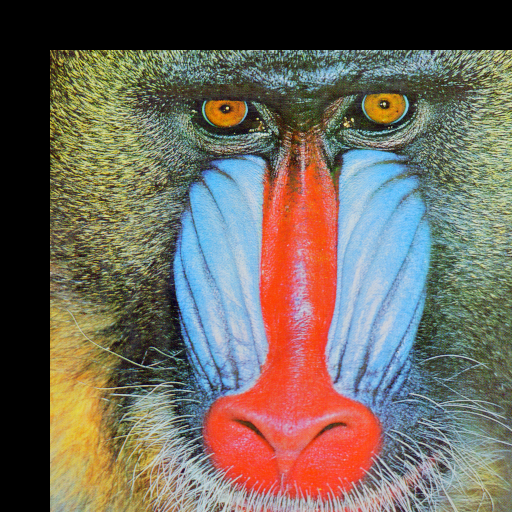

In [ ]:
imagem_transladada_warpAffine = translacao_warpAffine(img_color, 50, 50)

cv2_imshow(imagem_transladada_warpAffine)

### Resize de uma imagem

In [ ]:
def resize_image(img, factor_x, factor_y):
  H, W, C = img.shape

  H_new = int(H * factor_y)
  W_new = int(W * factor_x)

  img_resized = np.full((H_new, W_new, C), 0)

  for y in range(H_new):
    for x in range(W_new):
      y_new = int(y / factor_y)
      x_new = int(x / factor_x)
      img_resized[y, x, :] = img[y_new, x_new, :]

  return img_resized

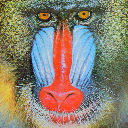

In [ ]:
img_resized = resize_image(img_color, 0.25, 0.25)

cv2_imshow(img_resized)

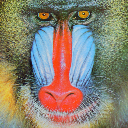

In [ ]:
# Código com a opencv
factor_x, factor_y = 0.25, 0.25
img_resized_cv = cv2.resize(img_color, None, fx=factor_x, fy=factor_y)

cv2_imshow(img_resized_cv)

#### Reflexão de uma imagem

In [ ]:
def reflexao_imagem(img):
  # Digite o codigo aqui
  pass

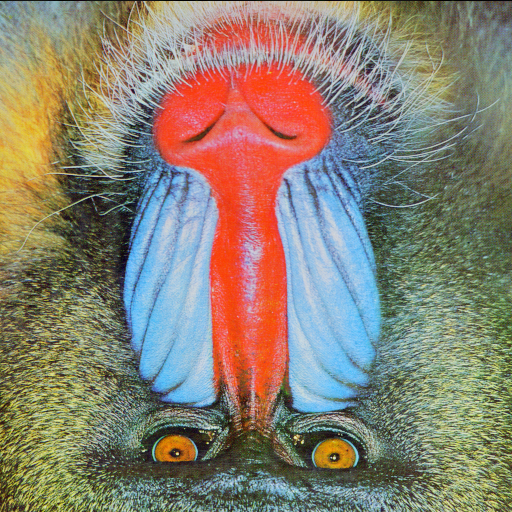

In [ ]:
img_reflex_X = np.flip(img_color, axis=0)# Eixo vertical
img_reflex_Y = np.flip(img_color, axis=1)# Eixo horizontal

cv2_imshow(img_reflex_X)

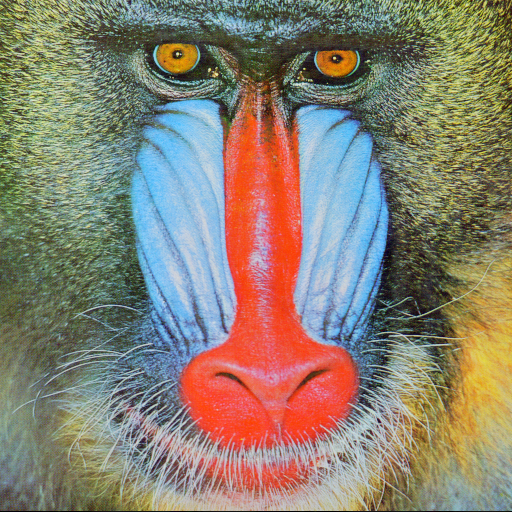

In [ ]:
cv2_imshow(img_reflex_Y)

### Rotação geral

In [ ]:
def rotacao_geral(img, angulo_rotacao):
  H, W, C = img.shape

  img_rotacionada = np.zeros((H, W, C))
  M = cv2.getRotationMatrix2D(((W-1)/2, (H-1)/2), angulo_rotacao, 1.0) # Added scale factor (1.0) and corrected center
  img_rotacionada = cv2.warpAffine(img, M, (W, H))

  return img_rotacionada

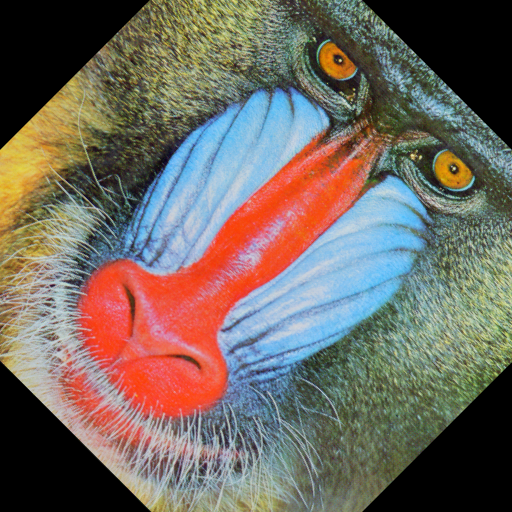

In [ ]:
img_rotacao_completa = rotacao_geral(img_color, -45)

cv2_imshow(img_rotacao_completa)

#### Equalização de uma imagem a partir do histograma

In [ ]:
im_path = "imagem"
img = cv2.imread(im_path)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(src)
cv2_imshow(src)
cv2_imshow(dst)